# Predict the Flight Ticket Price [MachineHack Hackathon]

<img src='flight1.jpg' style = 'height: 350px; width: 100%' />

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Data_Train.xlsx',
 'flight_price.ipynb',
 'Flight_Ticket_Participant_Datasets-20190305T100527Z-001',
 'Flight_Ticket_Participant_Datasets-20190305T100527Z-001.zip',
 'Test_set.xlsx',
 'Untitled.ipynb',
 '~$Test_set.xlsx']

In [3]:
train_df = pd.read_excel('Data_Train.xlsx')

In [4]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_df.isna().sum().sort_values(ascending=False)

Total_Stops        1
Route              1
Price              0
Additional_Info    0
Duration           0
Arrival_Time       0
Dep_Time           0
Destination        0
Source             0
Date_of_Journey    0
Airline            0
dtype: int64

### looks like an easy dataset..very less missing data

In [6]:
test_df = pd.read_excel('Test_set.xlsx')

In [7]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [8]:
test_df.isna().sum().sort_values(ascending=False)

Additional_Info    0
Total_Stops        0
Duration           0
Arrival_Time       0
Dep_Time           0
Route              0
Destination        0
Source             0
Date_of_Journey    0
Airline            0
dtype: int64

no missing data in test set

In [9]:
train_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# lets analyze the missing data

In [10]:
train_df.loc[train_df.Route.isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


#### i am just simply deleting this entry,dont think 1 entry will affect the data prediction that much

In [11]:
train_df.dropna(axis=0,inplace=True)

In [12]:
train_df.loc[train_df.Route.isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


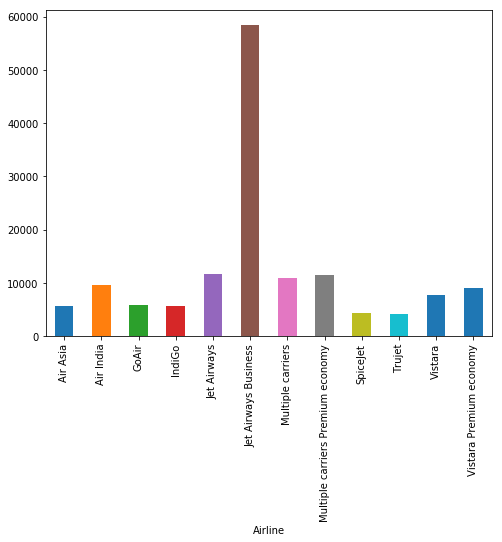

In [13]:
plt.figure(figsize=(8,6))
train_df.groupby('Airline').Price.mean().plot(kind='bar')
plt.show()

### Jet airways business is having an unusually higher price than others...may be for rich people

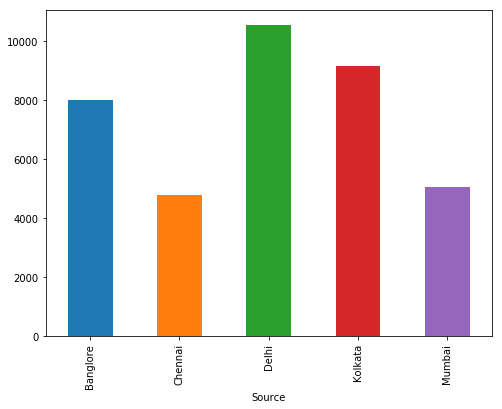

In [14]:
plt.figure(figsize=(8,6))
train_df.groupby('Source').Price.mean().plot(kind='bar')
plt.show()

### not a very conclusive graph , Flights originating from Delhi have a higher Price ..thats it

In [15]:
train_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Lets do some feature Engineering !!!

In [16]:
import re
s = '2h 50m'
tmp = re.findall(r'\d+',s)
if len(tmp) > 1:
    print(int(tmp[0]) + int(tmp[1]) / 60)
else:
    print(int(tmp[0]))

2.8333333333333335


In [17]:
import re
def duration_hrs(series):
    tmp = re.findall(r'\d+',series)
    if len(tmp) > 1:
        return(int(tmp[0]) + int(tmp[1]) / 60)
    else:
        return(int(tmp[0]))

In [18]:
train_df['travel_hrs'] = train_df.Duration.apply(duration_hrs).round(2)
test_df['travel_hrs'] = test_df.Duration.apply(duration_hrs).round(2)

In [19]:
train_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,travel_hrs
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2.83
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,7.42
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,19.00
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5.42
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,4.75


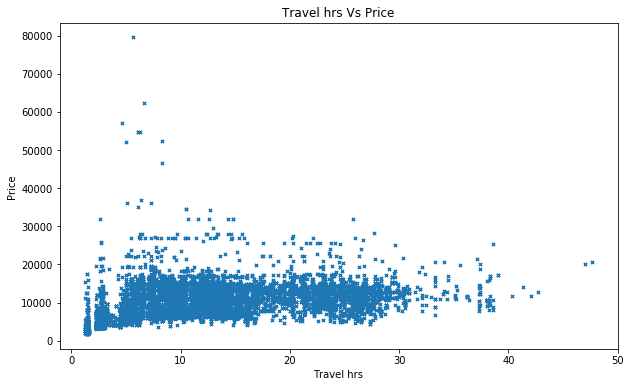

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(x=train_df.travel_hrs,y=train_df.Price,marker='x',s=10)
plt.title('Travel hrs Vs Price')
plt.xlabel('Travel hrs')
plt.ylabel('Price')
plt.show()

#### doesnt look like to be strong relationship....

In [21]:
train_df.travel_hrs.corr(train_df.Price)

0.5066122690686344

In [22]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,travel_hrs
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2.83
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,7.42
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,19.00
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5.42
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,4.75


In [23]:
pd.DatetimeIndex(train_df.Date_of_Journey)

DatetimeIndex(['2019-03-24', '2019-01-05', '2019-09-06', '2019-12-05',
               '2019-01-03', '2019-06-24', '2019-12-03', '2019-01-03',
               '2019-12-03', '2019-05-27',
               ...
               '2019-05-27', '2019-12-03', '2019-09-06', '2019-01-05',
               '2019-05-21', '2019-09-04', '2019-04-27', '2019-04-27',
               '2019-01-03', '2019-09-05'],
              dtype='datetime64[ns]', name='Date_of_Journey', length=10682, freq=None)

In [24]:
train_df.Date_of_Journey.nunique()

44

In [25]:
train_df.Date_of_Journey = pd.to_datetime(train_df.Date_of_Journey)

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
Airline            10682 non-null object
Date_of_Journey    10682 non-null datetime64[ns]
Source             10682 non-null object
Destination        10682 non-null object
Route              10682 non-null object
Dep_Time           10682 non-null object
Arrival_Time       10682 non-null object
Duration           10682 non-null object
Total_Stops        10682 non-null object
Additional_Info    10682 non-null object
Price              10682 non-null int64
travel_hrs         10682 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 1.1+ MB


In [27]:
train_df.Date_of_Journey.nunique()

40

In [28]:
train_df.Date_of_Journey.sort_values()

3835   2019-01-03
7356   2019-01-03
486    2019-01-03
3545   2019-01-03
3543   2019-01-03
3535   2019-01-03
5964   2019-01-03
8451   2019-01-03
490    2019-01-03
1887   2019-01-03
1906   2019-01-03
5986   2019-01-03
1918   2019-01-03
9746   2019-01-03
5989   2019-01-03
4521   2019-01-03
8470   2019-01-03
4507   2019-01-03
8430   2019-01-03
7377   2019-01-03
1785   2019-01-03
1665   2019-01-03
8380   2019-01-03
5162   2019-01-03
7461   2019-01-03
5846   2019-01-03
5850   2019-01-03
1712   2019-01-03
5856   2019-01-03
1717   2019-01-03
          ...    
9914   2019-12-06
9916   2019-12-06
3685   2019-12-06
3670   2019-12-06
9893   2019-12-06
4414   2019-12-06
3995   2019-12-06
4028   2019-12-06
4384   2019-12-06
4370   2019-12-06
4359   2019-12-06
9788   2019-12-06
9791   2019-12-06
4314   2019-12-06
4303   2019-12-06
4302   2019-12-06
4292   2019-12-06
4027   2019-12-06
4285   2019-12-06
9803   2019-12-06
4213   2019-12-06
4205   2019-12-06
4169   2019-12-06
4096   2019-12-06
9841   201

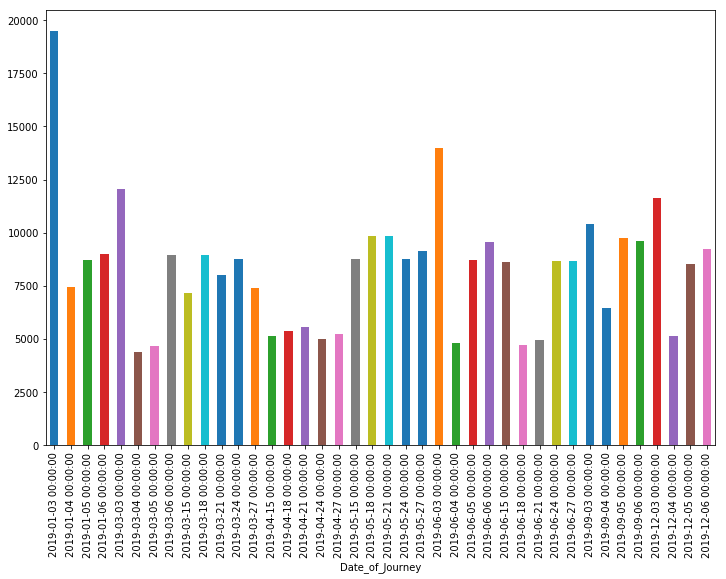

In [29]:
train_df.groupby('Date_of_Journey').Price.mean().plot(kind='bar',figsize=(12,8))

In [30]:
biz_days = pd.date_range(start='1/1/2017',end='7/1/2019',freq='B',closed='left')

In [31]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,travel_hrs
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2.83
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,7.42
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,19.00
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5.42
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,4.75


In [32]:
def date_type(series):
    if series not in biz_days:
        return('weekend')
    else:
        return('weekdays')

In [33]:
train_df['date_type'] = train_df.Date_of_Journey.apply(date_type)

In [34]:
train_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,travel_hrs,date_type
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2.83,weekend
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,7.42,weekend
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,19.00,weekend
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5.42,weekend
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,4.75,weekdays


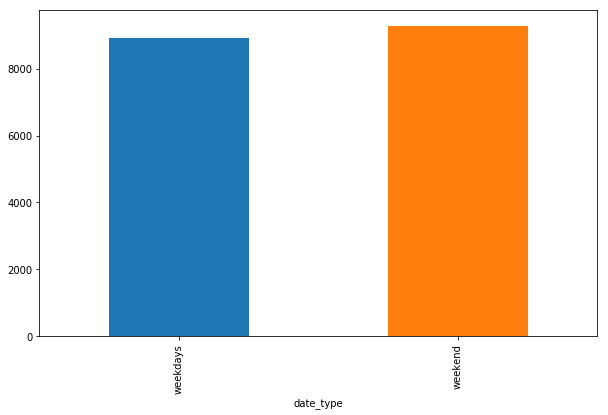

In [35]:
train_df.groupby('date_type').Price.mean().plot(kind='bar',figsize=(10,6))
plt.show()

### not a very conclusive graph ...weekend prices are slightly high

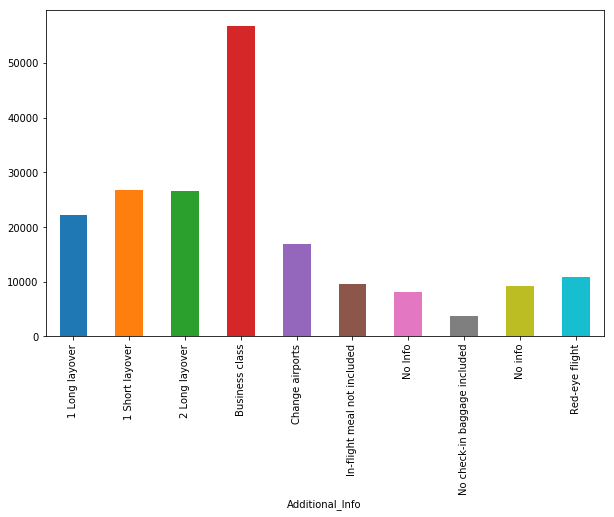

In [36]:
train_df.groupby('Additional_Info').Price.mean().plot(kind='bar',figsize=(10,6))
plt.show()

### Very strong relationship which shows layover passengers are having a higher fare price

In [37]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,travel_hrs,date_type
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2.83,weekend
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,7.42,weekend
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,19.00,weekend
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5.42,weekend
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,4.75,weekdays


In [38]:
def departure_hours(series):
    return(series.split(':')[0])

In [39]:
departure_hours('22:50')

'22'

In [40]:
train_df['Dep_hrs'] = train_df.Dep_Time.apply(departure_hours)

In [41]:
train_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,travel_hrs,date_type,Dep_hrs
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2.83,weekend,22
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,7.42,weekend,05
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,19.00,weekend,09
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5.42,weekend,18
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,4.75,weekdays,16


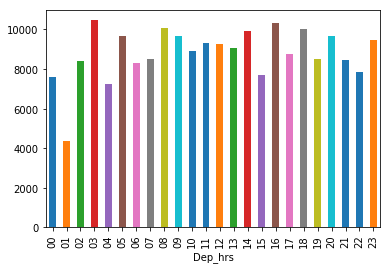

In [42]:
train_df.groupby('Dep_hrs').Price.mean().plot(kind='bar')

#### shows the trend of mean price remains the same throughout the day

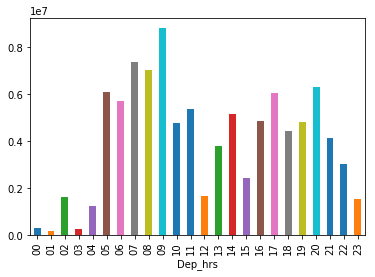

In [43]:
train_df.groupby('Dep_hrs').Price.sum().plot(kind='bar')

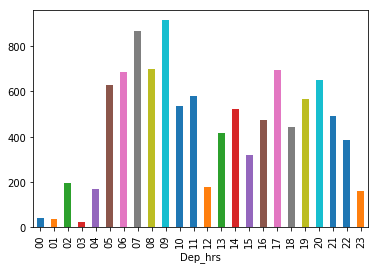

In [44]:
train_df.groupby('Dep_hrs').Price.count().plot(kind='bar')

In [45]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,travel_hrs,date_type,Dep_hrs
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2.83,weekend,22
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,7.42,weekend,05
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,19.00,weekend,09
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5.42,weekend,18
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,4.75,weekdays,16


In [46]:
train_df.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [47]:
train_df.Additional_Info = train_df.Additional_Info.str.replace('No Info','No info')

In [48]:
train_df.Additional_Info.value_counts()

No info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [49]:
train_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,travel_hrs,date_type,Dep_hrs
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2.83,weekend,22
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,7.42,weekend,05
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,19.00,weekend,09
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5.42,weekend,18
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,4.75,weekdays,16


In [50]:
def arrival_hrs(series):
    return(series.split(':')[0])

In [51]:
arrival_hrs('04:25 10 Jun')

'04'

In [52]:
train_df['arrival_hrs'] = train_df.Arrival_Time.apply(arrival_hrs)

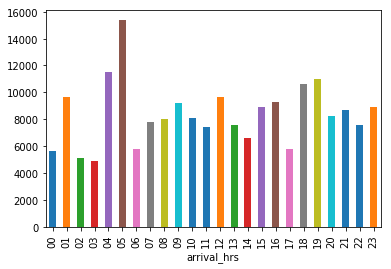

In [53]:
train_df.groupby('arrival_hrs').Price.mean().plot(kind='bar')

### can be an useful feature which shows flights arriving early in the morning having a higher mean price

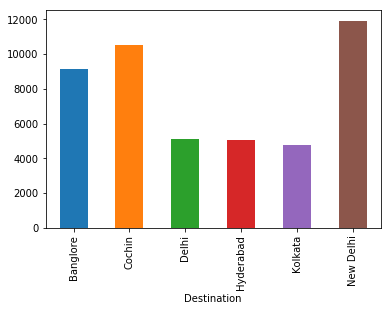

In [54]:
train_df.groupby('Destination').Price.mean().plot(kind='bar')

as we can see, there are entries with Delhi and New Delhi which are essentially same.Need to replace delhi with new delhmi

In [55]:
train_df.Destination = train_df.Destination.str.replace('New Delhi','Delhi')

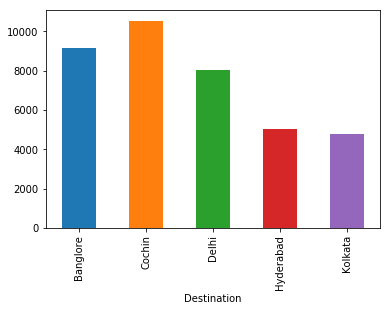

In [56]:
train_df.groupby('Destination').Price.mean().plot(kind='bar')

In [57]:
train_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,travel_hrs,date_type,Dep_hrs,arrival_hrs
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2.83,weekend,22,01
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,7.42,weekend,05,13
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,19.00,weekend,09,04
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5.42,weekend,18,23
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,4.75,weekdays,16,21


In [58]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,travel_hrs,date_type,Dep_hrs,arrival_hrs
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2.83,weekend,22,01
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,7.42,weekend,05,13
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,19.00,weekend,09,04
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5.42,weekend,18,23
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,4.75,weekdays,16,21


In [59]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,travel_hrs
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,10.92
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,4.00
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,23.75
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,13.00
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,2.83


## DATA PREPROCESSING::--
### Normally its a good practice to merge both the Test and Train sets , before creating creating dummies for categorical variable.
### Cuz in this way we make sure the dimensions of both test and train sets remains the same after applying pd.get_dummies()

In [60]:
train_df = pd.read_excel('Data_Train.xlsx')
test_df = pd.read_excel('Test_set.xlsx')
merged_dataset = pd.concat([train_df,test_df],axis=0)

C:\Users\Dibya\Anaconda3\envs\pt36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
merged_dataset.tail(5)

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops
2666,No info,Air India,20:25 07 Jun,6/06/2019,20:30,Banglore,23h 55m,NaN,CCU → DEL → BLR,Kolkata,1 stop
2667,No info,IndiGo,16:55,27/03/2019,14:20,Banglore,2h 35m,NaN,CCU → BLR,Kolkata,non-stop
2668,No info,Jet Airways,04:25 07 Mar,6/03/2019,21:50,Cochin,6h 35m,NaN,DEL → BOM → COK,Delhi,1 stop
2669,No info,Air India,19:15,6/03/2019,04:00,Cochin,15h 15m,NaN,DEL → BOM → COK,Delhi,1 stop
2670,No info,Multiple carriers,19:15,15/06/2019,04:55,Cochin,14h 20m,NaN,DEL → BOM → COK,Delhi,1 stop


In [62]:
merged_dataset.head(5)

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops
0,No info,IndiGo,01:10 22 Mar,24/03/2019,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop
1,No info,Air India,13:15,1/05/2019,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops
2,No info,Jet Airways,04:25 10 Jun,9/06/2019,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops
3,No info,IndiGo,23:30,12/05/2019,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop
4,No info,IndiGo,21:35,01/03/2019,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop


In [63]:
merged_dataset.head()

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops
0,No info,IndiGo,01:10 22 Mar,24/03/2019,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop
1,No info,Air India,13:15,1/05/2019,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops
2,No info,Jet Airways,04:25 10 Jun,9/06/2019,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops
3,No info,IndiGo,23:30,12/05/2019,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop
4,No info,IndiGo,21:35,01/03/2019,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop


In [64]:
merged_dataset.isna().sum()

Additional_Info       0
Airline               0
Arrival_Time          0
Date_of_Journey       0
Dep_Time              0
Destination           0
Duration              0
Price              2671
Route                 1
Source                0
Total_Stops           1
dtype: int64

In [65]:
merged_dataset.dropna(subset=['Route'],inplace=True)

In [66]:
merged_dataset.isna().sum()

Additional_Info       0
Airline               0
Arrival_Time          0
Date_of_Journey       0
Dep_Time              0
Destination           0
Duration              0
Price              2671
Route                 0
Source                0
Total_Stops           0
dtype: int64

In [67]:
merged_dataset.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2661, 2662, 2663, 2664, 2665, 2666, 2667, 2668, 2669, 2670],
           dtype='int64', length=13353)

In [68]:
merged_dataset.reset_index(drop=True,inplace=True)

In [69]:
merged_dataset.index

RangeIndex(start=0, stop=13353, step=1)

In [70]:
len(train_df)

10683

In [71]:
len(test_df)

2671

In [72]:
merged_dataset['travel_hrs'] = merged_dataset.Duration.apply(duration_hrs).round(2)

In [73]:
merged_dataset.Date_of_Journey = pd.to_datetime(merged_dataset.Date_of_Journey)

In [74]:
merged_dataset['date_type'] = merged_dataset.Date_of_Journey.apply(date_type)

In [75]:
merged_dataset['Dep_hrs'] = merged_dataset.Dep_Time.apply(departure_hours)

In [76]:
merged_dataset.Additional_Info = merged_dataset.Additional_Info.str.replace('No Info','No info')

In [77]:
merged_dataset['arrival_hrs'] = merged_dataset.Arrival_Time.apply(arrival_hrs)

In [78]:
merged_dataset.Destination = merged_dataset.Destination.str.replace('New Delhi','Delhi')

In [79]:
merged_dataset.head(5)

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,travel_hrs,date_type,Dep_hrs,arrival_hrs
0,No info,IndiGo,01:10 22 Mar,2019-03-24,22:20,Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop,2.83,weekend,22,01
1,No info,Air India,13:15,2019-01-05,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,7.42,weekend,05,13
2,No info,Jet Airways,04:25 10 Jun,2019-09-06,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,19.00,weekend,09,04
3,No info,IndiGo,23:30,2019-12-05,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop,5.42,weekend,18,23
4,No info,IndiGo,21:35,2019-01-03,16:50,Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop,4.75,weekdays,16,21


In [80]:
merged_dataset.travel_hrs = merged_dataset.travel_hrs.round()

In [81]:
merged_dataset.head()

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,travel_hrs,date_type,Dep_hrs,arrival_hrs
0,No info,IndiGo,01:10 22 Mar,2019-03-24,22:20,Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop,3.0,weekend,22,01
1,No info,Air India,13:15,2019-01-05,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,7.0,weekend,05,13
2,No info,Jet Airways,04:25 10 Jun,2019-09-06,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,19.0,weekend,09,04
3,No info,IndiGo,23:30,2019-12-05,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop,5.0,weekend,18,23
4,No info,IndiGo,21:35,2019-01-03,16:50,Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop,5.0,weekdays,16,21


In [82]:
merged_dataset.isna().sum()

Additional_Info       0
Airline               0
Arrival_Time          0
Date_of_Journey       0
Dep_Time              0
Destination           0
Duration              0
Price              2671
Route                 0
Source                0
Total_Stops           0
travel_hrs            0
date_type             0
Dep_hrs               0
arrival_hrs           0
dtype: int64

In [83]:
merged_dataset.head(1)

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,travel_hrs,date_type,Dep_hrs,arrival_hrs
0,No info,IndiGo,01:10 22 Mar,2019-03-24,22:20,Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop,3.0,weekend,22,01


In [84]:
merged_dataset.columns

Index(['Additional_Info', 'Airline', 'Arrival_Time', 'Date_of_Journey',
       'Dep_Time', 'Destination', 'Duration', 'Price', 'Route', 'Source',
       'Total_Stops', 'travel_hrs', 'date_type', 'Dep_hrs', 'arrival_hrs'],
      dtype='object')

In [85]:
merged_dataset.drop(columns=['Arrival_Time','Dep_Time','Duration','Route'],inplace=True)

In [86]:
merged_dataset.head(2)

,Additional_Info,Airline,Date_of_Journey,Destination,Price,Source,Total_Stops,travel_hrs,date_type,Dep_hrs,arrival_hrs
0,No info,IndiGo,2019-03-24,Delhi,3897.0,Banglore,non-stop,3.0,weekend,22,01
1,No info,Air India,2019-01-05,Banglore,7662.0,Kolkata,2 stops,7.0,weekend,05,13


In [87]:
trainset = merged_dataset[:len(train_df)]

In [88]:
testset = merged_dataset[len(train_df):]

In [89]:
testset.shape

(2670, 11)

In [90]:
trainset.shape

(10683, 11)

In [91]:
testset.head()

,Additional_Info,Airline,Date_of_Journey,Destination,Price,Source,Total_Stops,travel_hrs,date_type,Dep_hrs,arrival_hrs
10683,No info,IndiGo,2019-12-05,Banglore,NaN,Kolkata,1 stop,4.0,weekend,06,10
10684,In-flight meal not included,Jet Airways,2019-05-21,Cochin,NaN,Delhi,1 stop,24.0,weekdays,19,19
10685,No info,Multiple carriers,2019-05-21,Cochin,NaN,Delhi,1 stop,13.0,weekdays,08,21
10686,No info,Air Asia,2019-06-24,Delhi,NaN,Banglore,non-stop,3.0,weekdays,23,02
10687,In-flight meal not included,Jet Airways,2019-12-06,Cochin,NaN,Delhi,1 stop,18.0,weekend,18,12


In [92]:
import datetime

In [93]:
def weekday_special(series):
    tmp = str(series).split('-')
    if tmp[1].startswith('0'):
        tmp[1].lstrip('0')
    if tmp[0].startswith('0'):
        tmp[0].lstrip('0')
    return(datetime.datetime(int(tmp[0]),int(tmp[1]),int(tmp[2])).weekday())
        
    

In [94]:
datetime.datetime(2019,12,5).weekday()

3

In [95]:
merged_dataset.Date_of_Journey.sort_values(ascending=False).head()

4464    2019-12-06
10401   2019-12-06
1123    2019-12-06
6103    2019-12-06
1130    2019-12-06
Name: Date_of_Journey, dtype: datetime64[ns]

In [96]:
merged_dataset.Date_of_Journey = merged_dataset.Date_of_Journey.astype('str')
merged_dataset['weekday'] = merged_dataset.Date_of_Journey.apply(weekday_special)

In [97]:
merged_dataset.head()

,Additional_Info,Airline,Date_of_Journey,Destination,Price,Source,Total_Stops,travel_hrs,date_type,Dep_hrs,arrival_hrs,weekday
0,No info,IndiGo,2019-03-24,Delhi,3897.0,Banglore,non-stop,3.0,weekend,22,01,6
1,No info,Air India,2019-01-05,Banglore,7662.0,Kolkata,2 stops,7.0,weekend,05,13,5
2,No info,Jet Airways,2019-09-06,Cochin,13882.0,Delhi,2 stops,19.0,weekend,09,04,4
3,No info,IndiGo,2019-12-05,Banglore,6218.0,Kolkata,1 stop,5.0,weekend,18,23,3
4,No info,IndiGo,2019-01-03,Delhi,13302.0,Banglore,1 stop,5.0,weekdays,16,21,3


In [98]:
trainset = merged_dataset[:len(train_df)]

In [99]:
testset = merged_dataset[len(train_df):]

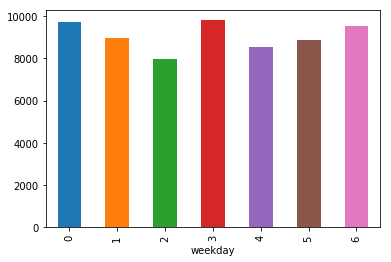

In [100]:
trainset.groupby('weekday').Price.mean().plot(kind='bar')

In [101]:
merged_dataset.head(3)

,Additional_Info,Airline,Date_of_Journey,Destination,Price,Source,Total_Stops,travel_hrs,date_type,Dep_hrs,arrival_hrs,weekday
0,No info,IndiGo,2019-03-24,Delhi,3897.0,Banglore,non-stop,3.0,weekend,22,01,6
1,No info,Air India,2019-01-05,Banglore,7662.0,Kolkata,2 stops,7.0,weekend,05,13,5
2,No info,Jet Airways,2019-09-06,Cochin,13882.0,Delhi,2 stops,19.0,weekend,09,04,4


In [102]:
merged_dataset.drop(columns=['Date_of_Journey','date_type'],inplace=True)

In [103]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13353 entries, 0 to 13352
Data columns (total 10 columns):
Additional_Info    13353 non-null object
Airline            13353 non-null object
Destination        13353 non-null object
Price              10682 non-null float64
Source             13353 non-null object
Total_Stops        13353 non-null object
travel_hrs         13353 non-null float64
Dep_hrs            13353 non-null object
arrival_hrs        13353 non-null object
weekday            13353 non-null int64
dtypes: float64(2), int64(1), object(7)
memory usage: 1.0+ MB


In [104]:
merged_dataset.weekday = merged_dataset.weekday.astype('str')
merged_dataset.travel_hrs = merged_dataset.travel_hrs.astype('str')

In [105]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13353 entries, 0 to 13352
Data columns (total 10 columns):
Additional_Info    13353 non-null object
Airline            13353 non-null object
Destination        13353 non-null object
Price              10682 non-null float64
Source             13353 non-null object
Total_Stops        13353 non-null object
travel_hrs         13353 non-null object
Dep_hrs            13353 non-null object
arrival_hrs        13353 non-null object
weekday            13353 non-null object
dtypes: float64(1), object(9)
memory usage: 1.0+ MB


In [106]:
merged_data = pd.get_dummies(merged_dataset,drop_first=True)

In [107]:
merged_data.head(5)

,Price,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Airline_Air India,...,arrival_hrs_20,arrival_hrs_21,arrival_hrs_22,arrival_hrs_23,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,3897.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,7662.0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,13882.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,6218.0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,13302.0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [108]:
merged_data.shape

(13353, 128)

In [109]:
trainset = merged_data[:len(train_df)-1]
testset = merged_data[len(train_df)-1:]

In [110]:
X = trainset.drop(columns=['Price'])
y = trainset['Price']
testset.drop(columns=['Price'],inplace=True)

C:\Users\Dibya\Anaconda3\envs\pt36\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [111]:
X.columns == testset.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [112]:
X.shape

(10682, 127)

In [113]:
testset.shape

(2671, 127)

In [114]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [115]:
#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [116]:
#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification


In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)


In [118]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]


In [119]:
rmsle=[]

In [120]:
for model in range (len(models)):
    clf=models[model]
    print('fitting model %s' %model)
    clf.fit(X_train,y_train)
    test_pred=clf.predict(X_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))

fitting model 0
fitting model 1
fitting model 2
fitting model 3
fitting model 4


In [121]:
rmsle

[0.24831062826620404,
 0.38142726958409306,
 0.2523464713891835,
 0.5198690326174294,
 0.25934916063370655]

In [122]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


Using TensorFlow backend.


In [171]:
regressor = Sequential()
regressor.add(Dense(output_dim = 30, init = 'uniform', activation = 'relu', input_dim = 127))
regressor.add(Dropout(0.3))
#Adding the second hidden layer
regressor.add(Dense(output_dim = 30, init = 'uniform', activation = 'relu'))
regressor.add(Dropout(0.3))
# Adding the output layer
regressor.add(Dense(output_dim = 1, init = 'uniform'))
# Compiling the ANN
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

In [172]:
logger = keras.callbacks.TensorBoard(
        log_dir='logs',
        write_graph=True,
        histogram_freq=5
        )

In [176]:
history = regressor.fit(X_train, y_train, batch_size = 20, nb_epoch = 500)

Epoch 1/500
9613/9613 [==============================] - 1s 98us/step - loss: 7350412.7292
Epoch 2/500
9613/9613 [==============================] - 1s 99us/step - loss: 7439750.5344
Epoch 3/500
9613/9613 [==============================] - 1s 97us/step - loss: 7668074.8968
Epoch 4/500
9613/9613 [==============================] - 1s 99us/step - loss: 7452651.6053
Epoch 5/500
9613/9613 [==============================] - 1s 102us/step - loss: 7398707.2144
Epoch 6/500
9613/9613 [==============================] - 1s 102us/step - loss: 7537861.3177
Epoch 7/500
9613/9613 [==============================] - 1s 100us/step - loss: 7326202.6157
Epoch 8/500
9613/9613 [==============================] - 1s 97us/step - loss: 7626227.5504
Epoch 9/500
9613/9613 [==============================] - 1s 99us/step - loss: 7591430.5928
Epoch 10/500
9613/9613 [==============================] - 1s 98us/step - loss: 7556454.6907
Epoch 11/500
9613/9613 [==============================] - 1s 98us/step - loss: 7232083

Epoch 90/500
9613/9613 [==============================] - 1s 99us/step - loss: 7175578.6184
Epoch 91/500
9613/9613 [==============================] - 1s 99us/step - loss: 7005831.2766
Epoch 92/500
9613/9613 [==============================] - 1s 98us/step - loss: 7198817.1581
Epoch 93/500
9613/9613 [==============================] - 1s 94us/step - loss: 7136796.2967
Epoch 94/500
9613/9613 [==============================] - 1s 94us/step - loss: 7225183.7336
Epoch 95/500
9613/9613 [==============================] - 1s 95us/step - loss: 7038332.5612
Epoch 96/500
9613/9613 [==============================] - 1s 94us/step - loss: 7189688.4324
Epoch 97/500
9613/9613 [==============================] - 1s 95us/step - loss: 6880924.7145
Epoch 98/500
9613/9613 [==============================] - 1s 95us/step - loss: 7314554.5494
Epoch 99/500
9613/9613 [==============================] - 1s 99us/step - loss: 6994832.8361
Epoch 100/500
9613/9613 [==============================] - 1s 94us/step - loss: 

9613/9613 [==============================] - 1s 99us/step - loss: 6712647.6036
Epoch 179/500
9613/9613 [==============================] - 1s 99us/step - loss: 6963386.5968
Epoch 180/500
9613/9613 [==============================] - 1s 97us/step - loss: 6986943.2740
Epoch 181/500
9613/9613 [==============================] - 1s 95us/step - loss: 6683763.8944
Epoch 182/500
9613/9613 [==============================] - 1s 96us/step - loss: 7129483.4634
Epoch 183/500
9613/9613 [==============================] - 1s 94us/step - loss: 6748457.6646
Epoch 184/500
9613/9613 [==============================] - 1s 94us/step - loss: 6915344.3376
Epoch 185/500
9613/9613 [==============================] - 1s 94us/step - loss: 6960176.4217
Epoch 186/500
9613/9613 [==============================] - 1s 94us/step - loss: 7151323.2237
Epoch 187/500
9613/9613 [==============================] - 1s 94us/step - loss: 6910703.4480
Epoch 188/500
9613/9613 [==============================] - 1s 94us/step - loss: 6944

9613/9613 [==============================] - 1s 98us/step - loss: 6470639.9354
Epoch 355/500
9613/9613 [==============================] - 1s 98us/step - loss: 6594673.6604
Epoch 356/500
9613/9613 [==============================] - 1s 94us/step - loss: 6623531.4592
Epoch 357/500
9613/9613 [==============================] - 1s 94us/step - loss: 6379139.0328
Epoch 358/500
9613/9613 [==============================] - 1s 94us/step - loss: 6702466.1632
Epoch 359/500
9613/9613 [==============================] - 1s 95us/step - loss: 6631673.0908
Epoch 360/500
9613/9613 [==============================] - 1s 94us/step - loss: 6468790.2590
Epoch 361/500
9613/9613 [==============================] - 1s 95us/step - loss: 6512691.4594
Epoch 362/500
9613/9613 [==============================] - 1s 94us/step - loss: 6692843.4351
Epoch 363/500
9613/9613 [==============================] - 1s 95us/step - loss: 6810314.1387
Epoch 364/500
9613/9613 [==============================] - 1s 94us/step - loss: 6445

In [174]:
test_pred=regressor.predict(X_test)
np.sqrt(mean_squared_log_error(test_pred,y_test))

0.2560517041517107

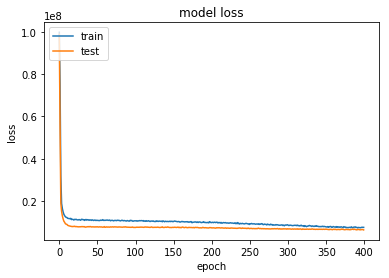

In [175]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### ***I WILL BE DOING MORE ANALYSIS ON THIS DATASET , WHEN I GET FREE TIME IN FUTURE ***